# Multi Objective Robust Decision Making


In [4]:
from ema_workbench import (Model, RealParameter, Policy, ScalarOutcome)
from ema_workbench.util import ema_logging, save_results, load_results

from problem_formulation import get_model_for_problem_formulation

# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

%matplotlib inline

ema_logging.log_to_stderr(ema_logging.INFO)

'''
For different list of outcomes:
# 0 = 2-objective PF
# 1 = 3-objective PF
# 2 = 5-objective PF
# 3 = Disaggregate over locations
# 4 = Disaggregate over time
# 5 = Fully disaggregated
'''

dike_model, planning_steps = get_model_for_problem_formulation(2) # assign problem_formulation_id

C:\Users\georg\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [9]:
#for uncertainties in dike_model.uncertainties:
#    print(uncertainties)

In [10]:
#for levers in dike_model.levers:
#    print(levers)

### Just run some simple experiments 
The next step is to run the model. For this we use an evaluator and the perform_experiments method. The workbench by default will use a latin hypercupe sampler to generate points in the parameter space defined by the uncertainties and/or levers. The uncertainties jointly span the uncertainty space. The levers (not used in this example) span the lever space. A point in uncertainty space is a scenario. A point in lever space is a policy. The combination of a scenario and a policy (where either might be None) is an experiment.

In [3]:
# with no policies, still don't understand how this thing works but in general we set for all
# the location and all time steps the policies equal to zero
ref_policy = {'DikeIncrease': 0, 'DaysToThreat': 0, 'RfR': 0}

policy0 = {}
for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    if ' ' in s2:
        s2, s3 = s2.split(' ')
    policy0.update({key.name: ref_policy[s2]})                

policy0 = Policy('Policy 0', **policy0)

In [4]:
# the first number is the location and the second the location
policy0

Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})

In [15]:
%%time

##Paralel computing
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments)

ema_logging.log_to_stderr(ema_logging.INFO)

#If you don't specicy the number of processors than it will use the maximum core of the PC
with MultiprocessingEvaluator(dike_model) as evaluator:
    # you can save experiments, outcomes and results, experiments have the uncertain parameters
    # and their values in the different expriments, the outcome have for each scenario the metrics 
    # in the specified aggregation level, results is actually both together in a tuple form
    results = evaluator.perform_experiments(scenarios=5000, policies=policy0)
save_results(results, "policy0 5000runsexperiments.tar.gz")

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 5000 scenarios * 1 policies * 1 model(s) = 5000 experiments
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1500 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 2500 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 3500 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 4500 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to C:\Users\georg\OneDrive\Documents\GitHub\MBDM-group-11\final assignment\policy0 500runsexperiments.tar.gz


Wall time: 52min 40s


In [5]:
results = load_results(".\policy0 5000runsexperiments.tar.gz")
experiments, outcomes = results

[MainProcess/INFO] results loaded succesfully from C:\Users\georg\OneDrive\Documents\GitHub\MBDM-group-11\final assignment\policy0 5000runsexperiments.tar.gz


In [6]:
outcomes

{'Expected Annual Damage': array([2.05708844e+08, 4.84710839e+08, 1.18706518e+09, ...,
        4.56895832e+08, 4.63513446e+09, 2.02693553e+08]),
 'Dike Investment Costs': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'RfR Investment Costs': array([0., 0., 0., ..., 0., 0., 0.]),
 'Evacuation Costs': array([0., 0., 0., ..., 0., 0., 0.]),
 'Expected Number of Deaths': array([0.21011924, 0.76560023, 2.30716727, ..., 0.37588861, 3.64566586,
        0.38239041])}

C:\Users\georg\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\georg\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\georg\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
[MainProcess/INFO] no time dimension found in results


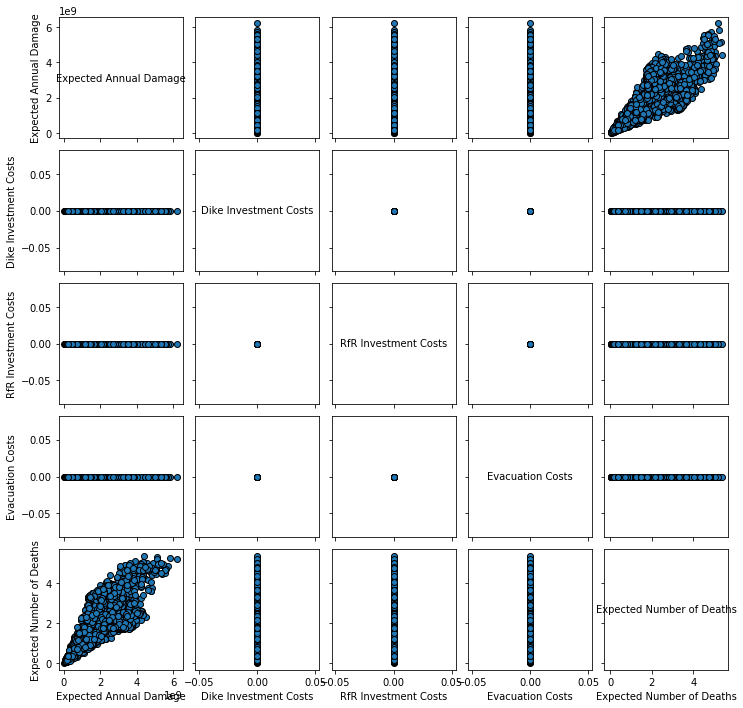

In [20]:
###Visualization - checking trade-offs analyzing outcomes Vs outcomes
from ema_workbench.analysis import pairs_plotting

#Normal scatter plot outcomes Vs outcomes
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes,
                                         legend=False)
fig.set_size_inches(12,12)

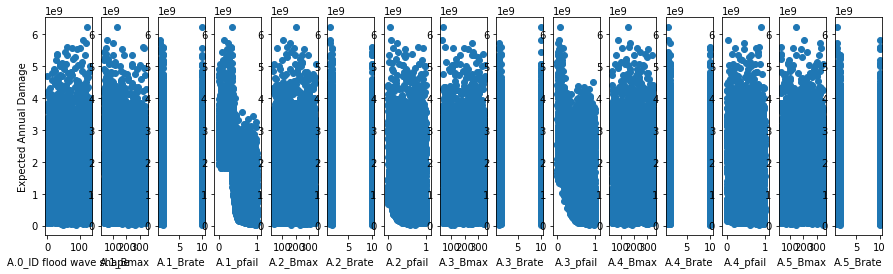

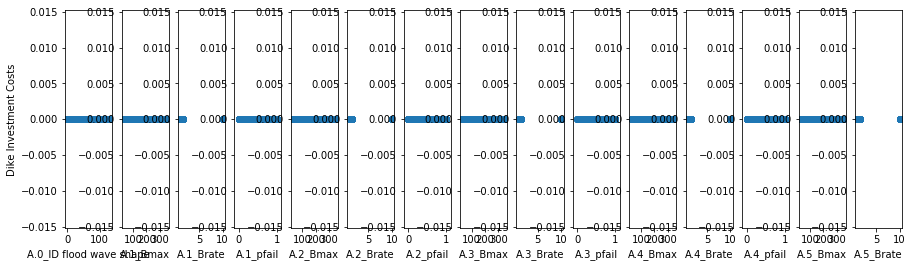

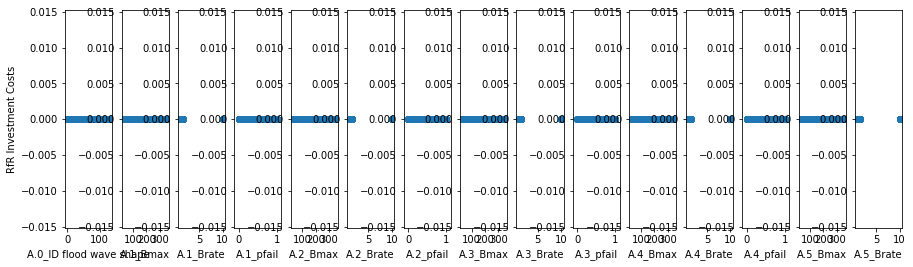

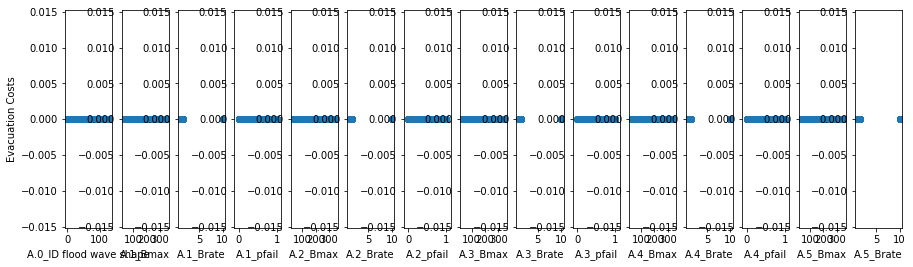

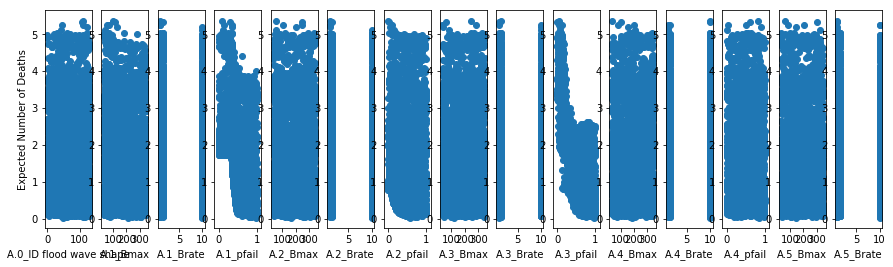

In [46]:
###Visualization - checking trade-offs analyzing outcomes Vs uncertainties

#Using the data generated without using the workbench
import matplotlib.pyplot as plt
outcomes_vars=list(outcomes.keys())
uncertain_vars=list(experiments.columns[:15])

### not completely understood how this graphs are generated but anyway

#STRUCTURE OF HTE PLOTS
### ooi random variable that he does not want to use
for ooi in outcomes_vars:
    fig, axarr=plt.subplots(nrows=1,ncols=15,figsize=(15,4))
    
    #DOING THE PLOTS
    for i, unc in enumerate(uncertain_vars):
        #scaterplot
        sc=axarr[i].scatter(list(experiments[unc]),outcomes[ooi])
        axarr[i].set_xlabel(unc)
    
    #this label is outside the loop because only 1 label is necessary for each row
    axarr[0].set_ylabel(ooi)
    
    #Showing the plots
    plt.show()
        
        

# Scenario Discovery

In [ ]:
import pandas as pd
from ema_workbench.analysis import prim

#Getting the relevant columns '
# in X are the parameters of the experiments 
x = data.iloc[:, 2:11]
# y is the one outcome of interest of the experiment
y = data.iloc[:, 15]
#1 is outcome of interested
y = y.values

In [29]:
#Importing ema_workbench
from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, perform_experiments,ema_logging)

# how we want to report the progress of the experiments
ema_logging.log_to_stderr(ema_logging.INFO)

#Using PRIM
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

# density is how many of the results in the box of the last iteration, are results of interest
# coverage is how many of the total results of interest that exist in the output space are 
# included in the final PRIM box

NameError: name 'prim' is not defined

In [ ]:
import matplotlib.pyplot as plt

### It is actually a tradeoff between decreasing coverage and increasing density
#Visualization
box1.show_tradeoff()
plt.show()

### as the box decreases in size the coverage decreases

In [ ]:
import matplotlib.pyplot as plt

### It is actually a tradeoff between decreasing coverage and increasing density
#Visualization
box1.show_tradeoff()
plt.show()

### as the box decreases in size the coverage decreases

In [ ]:
import matplotlib.pyplot as plt

### It is actually a tradeoff between decreasing coverage and increasing density
#Visualization
box1.show_tradeoff()
plt.show()

### as the box decreases in size the coverage decreases

In [ ]:
#Using CART
from ema_workbench.analysis import cart
#Creating CART with 5% of observations in a leaf
cart_alg = cart.CART(x,y, 0.05)
cart_alg.build_tree()

In [ ]:
#Using CART
from ema_workbench.analysis import cart
#Creating CART with 5% of observations in a leaf
cart_alg = cart.CART(x,y, 0.05)
cart_alg.build_tree()

## Subspace Partitioning

In [ ]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()

# Perform Sensitivity Analysis (Assignment 6)

In [ ]:
### perform the regression 
### isolate the uncertainties 
uncer = experiments.iloc[:,0:4]
import statsmodels.api as sm
import statsmodels.formula.api as smf

uncer['prey_final_step']= prey_final_step
uncer['prey_average'] = prey_average
uncer['prey_sdv'] = prey_sdv

results1 = smf.ols('prey_final_step ~ predation_rate + predator_efficiency + predator_loss_rate', data = uncer).fit()
results2 = smf.ols('prey_average ~ predation_rate + predator_efficiency + predator_loss_rate', data = uncer).fit()
results3 = smf.ols('prey_sdv ~ predation_rate + predator_efficiency + predator_loss_rate', data = uncer).fit()
print(results1.summary())

In [ ]:
from SALib.analyze import sobol
### the get_SALib problem probably transposes our model in a way that emma_workbench
### can understand it

from ema_workbench.em_framework.salib_samplers import get_SALib_problem
nr_of_experiments = 50
nr_of_sobol_experiments = 10*nr_of_experiments

### the basic thing that we do with the workbench
with SequentialEvaluator(model) as evaluator:
    sa_results = evaluator.perform_experiments(scenarios=nr_of_sobol_experiments,
                                               uncertainty_sampling = 'sobol')
    

In [ ]:
experiments, outcomes = sa_results 

### get only the prey of the outcomes that we are interested in
prey = outcomes['prey']
prey = prey[:,0,1460]

problem = get_SALib_problem(model.uncertainties)
### Si is a dictionary containing the S1 effects first order effects for the four variables
### the S1_conf, the ST, the ST_conf and the S2 -the second order effects- which are actually
### tables 
Si = sobol.analyze(problem, prey, calc_second_order = True)

In [ ]:
### Vizualize the results 
import seaborn as sns

scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [ ]:
uncer = experiments.iloc[:,0:4]
y1=feature_scoring.get_ex_feature_scores(uncer,prey,nr_trees=100,max_features=0.6,mode=RuleInductionType.REGRESSION)

In [ ]:
y1